# Regressões sobre conjunto de dados simples

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error

In [2]:
csv = pd.read_csv("fuel.csv")
df = pd.DataFrame(data=csv)
df.head()

,MassaCarroLibras,MilhasPorLitro
0,3.50,18
1,3.69,15
2,3.44,18
3,3.43,16
4,4.34,15


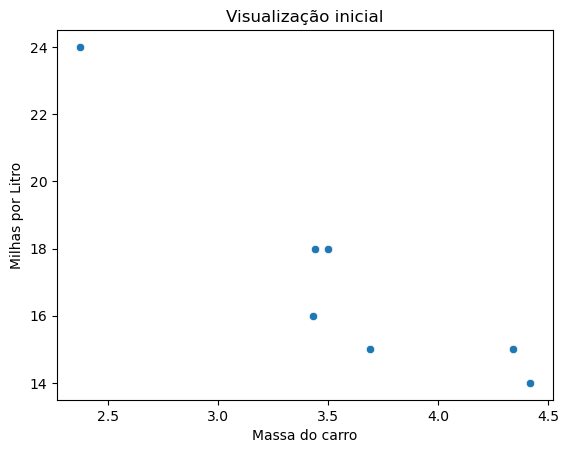

In [3]:
sns.scatterplot(data=df, x="MassaCarroLibras", y="MilhasPorLitro")
plt.xlabel("Massa do carro")
plt.ylabel("Milhas por Litro")
plt.title("Visualização inicial")
plt.show()

Inclinação (m): -4.57
Intercepto (b): 33.59
LINEAR - Erro quadrático médio:  1.4696694813659537
RIDGE - Erro quadrático médio:  2.0474367861724256
LASSO - Erro quadrático médio:  3.964781099420376


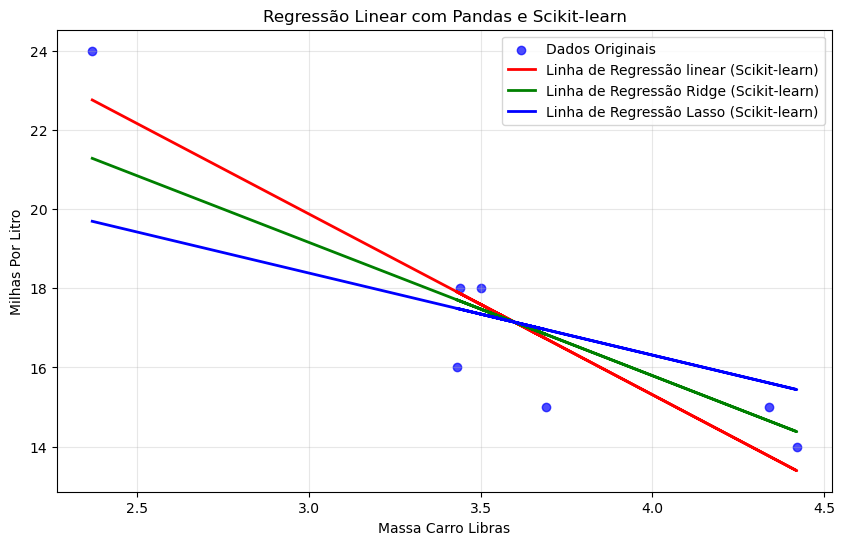

In [4]:
# Separando X e y
X = df[["MassaCarroLibras"]]  # Formato de matriz esperado pelo Scikit-learn (2D)
y = df["MilhasPorLitro"]

# Regressão Linear com Scikit-learn
model = LinearRegression()
ridge = Ridge()
lasso = Lasso()

model.fit(X, y)
ridge.fit(X, y)
lasso.fit(X, y)

# Coeficientes da regressão linear
m = model.coef_[0]  # Inclinação
b = model.intercept_  # Intercepto
print(f"Inclinação (m): {m:.2f}")
print(f"Intercepto (b): {b:.2f}")

# Previsões
df["y_pred"] = model.predict(X)
df["y_pred_ridge"] = ridge.predict(X)
df["y_pred_lasso"] = lasso.predict(X)

print("LINEAR - Erro quadrático médio: ", mean_squared_error(y, df["y_pred"]) )
print("RIDGE - Erro quadrático médio: " , mean_squared_error(y, df["y_pred_ridge"]) )
print("LASSO - Erro quadrático médio: " , mean_squared_error(y, df["y_pred_lasso"]) )

# Visualizando os dados e a linha de regressão
plt.figure(figsize=(10, 6))

plt.scatter(df["MassaCarroLibras"], df["MilhasPorLitro"], label="Dados Originais", color="blue", alpha=0.7)
plt.plot(df["MassaCarroLibras"], df["y_pred"], label="Linha de Regressão linear (Scikit-learn)", color="red", linewidth=2)
plt.plot(df["MassaCarroLibras"], df["y_pred_ridge"], label="Linha de Regressão Ridge (Scikit-learn)", color="green", linewidth=2)
plt.plot(df["MassaCarroLibras"], df["y_pred_lasso"], label="Linha de Regressão Lasso (Scikit-learn)", color="blue", linewidth=2)

plt.xlabel("Massa Carro Libras")
plt.ylabel("Milhas Por Litro")
plt.title("Regressão Linear com Pandas e Scikit-learn")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
